In [1]:
import pandas as pd
import seaborn as cbs
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline

Gathering the data

In [2]:
data_dia=pd.read_csv("diabetes.csv")
data_liver=pd.read_csv("Indian Liver Patient Dataset (ILPD).csv",names=["Age","Gender","TB","DB","Alkphos","Sgpt","Sgot","TP","ALB","A/G Ratio","Outcome"])
data_breast=pd.read_csv("breast-cancer-wisconsin.data.csv",names=["id", "Clump Thickness","Uniformity of Cell Size","Uniformity of Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","Outcome"])
data_breast=data_breast.drop("id",axis=1)


In [3]:
data_liver.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Outcome
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
data_breast.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Outcome
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [5]:
data_breast["Outcome"]=(data_breast["Outcome"]-2)/2
for i in range(data_liver["Outcome"].size):
    if(data_liver["Outcome"][i]==1):
        data_liver["Outcome"][i]=1
    else:
        data_liver["Outcome"][i]=0

C:\Users\rollaball\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\rollaball\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
print(data_dia.shape)
data_dia.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
print(data_liver.shape)
data_liver.head()

(583, 11)


,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Outcome
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [8]:
print(data_liver.shape)
data_breast.head()

(583, 11)


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Outcome
0,5,1,1,1,2,1,3,1,1,0.0
1,5,4,4,5,7,10,3,2,1,0.0
2,3,1,1,1,2,2,3,1,1,0.0
3,6,8,8,1,3,4,3,7,1,0.0
4,4,1,1,3,2,1,3,1,1,0.0


In [9]:
data_liver.groupby("Outcome").count()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
Outcome,,,,,,,,,,
0,167,167,167,167,167,167,167,167,167,165
1,416,416,416,416,416,416,416,416,416,414


In [10]:
print(data_liver[data_liver.isnull().any(axis=1)])
data_liver=data_liver.dropna(axis=0, how='any')

     Age  Gender   TB   DB  Alkphos  Sgpt  Sgot   TP  ALB  A/G Ratio  Outcome
209   45  Female  0.9  0.3      189    23    33  6.6  3.9        NaN        1
241   51    Male  0.8  0.2      230    24    46  6.5  3.1        NaN        1
253   35  Female  0.6  0.2      180    12    15  5.2  2.7        NaN        0
312   27    Male  1.3  0.6      106    25    54  8.5  4.8        NaN        0


In [11]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
data_liver["Gender"]=enc.fit_transform(data_liver["Gender"])

In [12]:
print(data_breast["Bare Nuclei"].unique())
data_breast.groupby("Bare Nuclei").count()

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Outcome
Bare Nuclei,,,,,,,,,
1,402,402,402,402,402,402,402,402,402
10,132,132,132,132,132,132,132,132,132
2,30,30,30,30,30,30,30,30,30
3,28,28,28,28,28,28,28,28,28
4,19,19,19,19,19,19,19,19,19
5,30,30,30,30,30,30,30,30,30
6,4,4,4,4,4,4,4,4,4
7,8,8,8,8,8,8,8,8,8
8,21,21,21,21,21,21,21,21,21


In [13]:
data_breast=data_breast[data_breast["Bare Nuclei"]!="?"]
data_breast["Bare Nuclei"]=pd.to_numeric(data_breast["Bare Nuclei"])

In [14]:
liver_y=np.array(data_liver.Outcome)
diabetes_y=np.array(data_dia.Outcome)
breast_y=np.array(data_breast.Outcome)

data_liver=data_liver.drop("Outcome",axis=1)
data_dia=data_dia.drop("Outcome",axis=1)
data_breast=data_breast.drop("Outcome",axis=1)

data=[data_liver,data_dia,data_breast]
target=[liver_y,diabetes_y,breast_y]

Now let us Plot the data


We will us PCA to reduce the dimensions

In [15]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
def plot_pca(x,target):
    pca_data=pca.fit_transform(x)
    for i in range(target.size):
        if target[i]==0:
            plt.plot(pca_data[i,0],pca_data[i,1],'bo')
        else:
            plt.plot(pca_data[i,0],pca_data[i,1],'ro')
    plt.show()

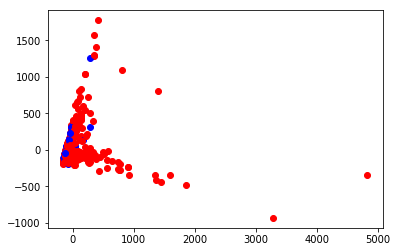

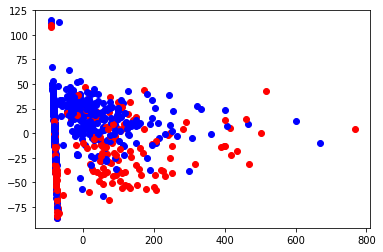

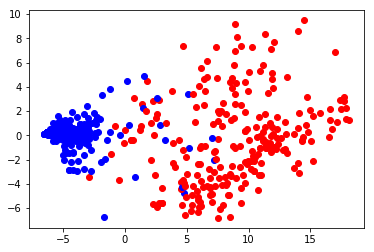

In [16]:
for i in range(3):
    plot_pca(data[i],target[i])

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
names = ["Nearest Neighbors","Logistic Regression", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]
data_names=["Liver Disorder","Diabetes","Breast Cancer"]
classifiers = [
    KNeighborsClassifier(10),
    LogisticRegression(),
    SVC(kernel="linear"),
    SVC(kernel="rbf"),                     
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
    ]
from sklearn.metrics import confusion_matrix

In [18]:
for j in range(3):
    print(data_names[j])
    for i in list(range(len(classifiers))):
        X_train,X_test,y_train,y_test=train_test_split(data[j],target[j],test_size=.25,random_state=42)
        clf=classifiers[i]
        clf.fit(X_train,y_train)
        y_pred=clf.predict(X_test)
        conf=confusion_matrix(y_test,y_pred)
        TPR=conf[1][1]/(conf[1][1]+conf[1][0])
        SPC=conf[1][1]/(conf[1][1]+conf[0][1])
        print("For ",names[i]," accuracy is ",accuracy_score(y_pred,y_test),"TPR=",TPR,"SPC",SPC)

Liver Disorder
For  Nearest Neighbors  accuracy is  0.6275862068965518 TPR= 0.8064516129032258 SPC 0.6756756756756757
For  Logistic Regression  accuracy is  0.6344827586206897 TPR= 0.978494623655914 SPC 0.6408450704225352
For  Linear SVM  accuracy is  0.6413793103448275 TPR= 1.0 SPC 0.6413793103448275
For  RBF SVM  accuracy is  0.6482758620689655 TPR= 1.0 SPC 0.6458333333333334
For  Gaussian Process  accuracy is  0.4896551724137931 TPR= 0.45161290322580644 SPC 0.6461538461538462
For  Decision Tree  accuracy is  0.6551724137931034 TPR= 0.8279569892473119 SPC 0.6936936936936937
For  Random Forest  accuracy is  0.6551724137931034 TPR= 0.946236559139785 SPC 0.6616541353383458
For  Neural Net  accuracy is  0.6413793103448275 TPR= 0.989247311827957 SPC 0.6433566433566433
For  AdaBoost  accuracy is  0.6620689655172414 TPR= 0.8279569892473119 SPC 0.7
For  Naive Bayes  accuracy is  0.6 TPR= 0.3978494623655914 SPC 0.9487179487179487
For  QDA  accuracy is  0.6068965517241379 TPR= 0.41935483870967

C:\Users\rollaball\Miniconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in longlong_scalars
  # Remove the CWD from sys.path while we load stuff.


For  Gaussian Process  accuracy is  0.7239583333333334 TPR= 0.6231884057971014 SPC 0.6142857142857143
For  Decision Tree  accuracy is  0.6979166666666666 TPR= 0.6521739130434783 SPC 0.569620253164557
For  Random Forest  accuracy is  0.6927083333333334 TPR= 0.463768115942029 SPC 0.5925925925925926
For  Neural Net  accuracy is  0.640625 TPR= 0.4492753623188406 SPC 0.5
For  AdaBoost  accuracy is  0.7239583333333334 TPR= 0.6231884057971014 SPC 0.6142857142857143
For  Naive Bayes  accuracy is  0.734375 TPR= 0.6811594202898551 SPC 0.618421052631579
For  QDA  accuracy is  0.765625 TPR= 0.6956521739130435 SPC 0.6666666666666666
Breast Cancer
For  Nearest Neighbors  accuracy is  0.9473684210526315 TPR= 0.8823529411764706 SPC 0.9836065573770492
For  Logistic Regression  accuracy is  0.9473684210526315 TPR= 0.8823529411764706 SPC 0.9836065573770492
For  Linear SVM  accuracy is  0.9532163742690059 TPR= 0.8970588235294118 SPC 0.9838709677419355
For  RBF SVM  accuracy is  0.9649122807017544 TPR= 0.9

In [19]:
KNeighborsClassifier(10),
    LogisticRegression(),
    SVC(kernel="linear",probablity=True),
    SVC(kernel="rbf"),                     
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()

IndentationError: unexpected indent (<ipython-input-19-729a04cfabff>, line 2)

In [56]:
from sklearn.metrics import roc_curve,auc
clf=RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
clf.fit(data_liver,liver_y.reshape(-1,1))
prob=clf.predict_proba(data_liver)
pred=clf.predict(data_liver)

C:\Users\rollaball\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
prob

array([[0.41740688, 0.58259312],
       [0.01653643, 0.98346357],
       [0.01653643, 0.98346357],
       ...,
       [0.25659308, 0.74340692],
       [0.38565848, 0.61434152],
       [0.53328935, 0.46671065]])

In [58]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(liver_y.reshape(-1,1), prob[:,1])


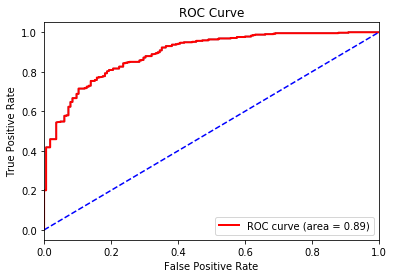

In [59]:
plt.figure()
plt.plot(fpr,tpr)
plt.plot(fpr, tpr, color='red',
         lw=2, label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

0.8063680281071586

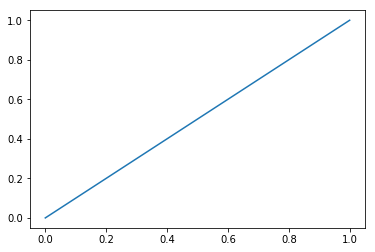

In [64]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Automatically created module for IPython interactive environment


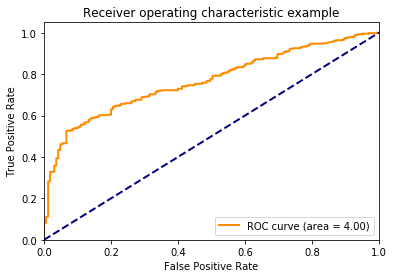

In [40]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % 4)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [24]:
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

In [36]:
def single_layer(x,y,z):
    oenc=OneHotEncoder()
    d=oenc.fit_transform(y.reshape(-1, 1))
    d=np.array(d.todense())
    X_train,X_test,y_train,y_test=train_test_split(x,d,test_size=.25,random_state=42)
    X_tf=tf.placeholder(tf.float32,[None,x.shape[1]])
    y_tf=tf.placeholder(tf.float32,[None,d.shape[1]])
    W=tf.Variable(tf.zeros([x.shape[1],d.shape[1]]))
    b=tf.Variable(tf.zeros([d.shape[1]]))
    y_=tf.nn.softmax(tf.matmul(X_tf,W)+b)
    cross_entropy=tf.reduce_mean(-tf.reduce_sum(y_tf * tf.log(y_), reduction_indices=[1]))
    train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()
    for _ in range(100):
        sess.run(train_step, feed_dict={X_tf: np.array(X_train), y_tf: y_train})
    correct_prediction = tf.equal(tf.argmax(y_tf,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(z,sess.run(accuracy, feed_dict={X_tf: X_test, y_tf: y_test}))

In [38]:
for i in range(3):
    single_layer(data[i],target[i],data_names[i])

Liver Disorder 0.3586207


ValueError: Cannot feed value of shape (434, 10) for Tensor 'Placeholder_28:0', which has shape '(?, 8)'

In [33]:
data_liver.shape[0]

579

In [51]:
def multi_layer(x,y,z):
    oenc=OneHotEncoder()
    d=oenc.fit_transform(y.reshape(-1, 1))
    d=np.array(d.todense())
    
    X_train,X_test,y_train,y_test=train_test_split(x,d,test_size=.25,random_state=42)
    
    X_tf=tf.placeholder(tf.float32,[None,x.shape[1]])
    y_tf=tf.placeholder(tf.float32,[None,d.shape[1]])
    
    l1_nodes=1000
    l2_nodes=1000
    l3_nodes=1000
    
    hidden_layer_1={'weights':tf.Variable(tf.random_normal([x.shape[1],l1_nodes])),'bias':tf.Variable(tf.random_normal([l1_nodes]))}
    hidden_layer_2={'weights':tf.Variable(tf.random_normal([l1_nodes,l2_nodes])),'bias':tf.Variable(tf.random_normal([l2_nodes]))}
    hidden_layer_3={'weights':tf.Variable(tf.random_normal([l2_nodes,l3_nodes])),'bias':tf.Variable(tf.random_normal([l3_nodes]))}
    output_layer={'weights':tf.Variable(tf.random_normal([l3_nodes,d.shape[1]])),'bias':tf.Variable(tf.random_normal([d.shape[1]]))}
    
    l1=tf.add(tf.matmul(X_tf,hidden_layer_1['weights']),hidden_layer_1['bias'])
    l1=tf.nn.relu(l1)
    l2=tf.add(tf.matmul(l1,hidden_layer_2['weights']),hidden_layer_2['bias'])
    l2=tf.nn.relu(l2)
    l3=tf.add(tf.matmul(l2,hidden_layer_3['weights']),hidden_layer_3['bias'])
    l3=tf.nn.relu(l3)
    output=tf.add(tf.matmul(l1,output_layer['weights']),output_layer['bias'])

    cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output,labels=y_tf))
    y_=tf.nn.softmax(output)
    cross_entropy=tf.reduce_mean(-tf.reduce_sum(y_tf * tf.log(y_), reduction_indices=[1]))
    optimizer=tf.train.AdamOptimizer().minimize(cost)
    #optimizer=tf.train.AdamOptimizer().minimize(cost)
    sess=tf.InteractiveSession()
    sess.run(tf.global_variables_initializer())
    for _ in range(1000):
        sess.run(optimizer, feed_dict={X_tf: X_train, y_tf:y_train})

    correct_prediction = tf.equal(tf.argmax(y_tf,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(z,sess.run(accuracy, feed_dict={X_tf: X_test, y_tf: y_test}))

In [52]:
for i in range(3):
    multi_layer(data[i],target[i],data_names[i])

Liver Disorder 0.64827585
Diabetes 0.6770833
Breast Cancer 0.91812867


In [42]:
target[1].shape

(768,)